# Level A

# A1. Loading Dataset and Libs

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


| Attribute            | Type       | Explanation                                                             |
|----------------------|------------|-------------------------------------------------------------------------|
| fixed acidity        | Continuous | Represents concentration of acids, can take any float value in a range. |
| volatile acidity     | Continuous | Represents acetic acid content, measured continuously.                  |
| citric acid          | Continuous | Concentration of citric acid, numeric, continuous.                      |
| residual sugar       | Continuous | Amount of sugar remaining after fermentation, numeric, continuous.      |
| chlorides            | Continuous | Salt content, measured as float, continuous.                            |
| free sulfur dioxide  | Continuous | Free SO₂ content, numeric, continuous.                                  |
| total sulfur dioxide | Continuous | Total SO₂ content, numeric, continuous.                                 |
| density              | Continuous | Wine density, numeric, continuous.                                      |
| pH                   | Continuous | Acidity level, numeric, continuous.                                     |
| sulphates            | Continuous | Sulfates content, numeric, continuous.                                  |
| alcohol              | Continuous | Alcohol % by volume, numeric, continuous.                               |
| quality              | Ordinal    | Wine quality score (0–10), ordered integers representing quality.       |


# A2. Descriptive Statistics

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
num_cols = df.select_dtypes(include="number").columns
num_cols = num_cols.drop("quality")
num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
mean_values = df[num_cols].mean()
median_values = df[num_cols].median()
mode_values = df[num_cols].mode().iloc[0]

range_values = df[num_cols].max() - df[num_cols].min()
variance_values = df[num_cols].var()
std_values = df[num_cols].std()
iqr_values = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)

stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Std Dev': std_values,
    'IQR': iqr_values
})

stats_df

,Mean,Median,Mode,Range,Variance,Std Dev,IQR
fixed acidity,8.319637,7.90000,7.2000,11.30000,3.031416,1.741096,2.100000
volatile acidity,0.527821,0.52000,0.6000,1.46000,0.032062,0.179060,0.250000
citric acid,0.270976,0.26000,0.0000,1.00000,0.037947,0.194801,0.330000
residual sugar,2.538806,2.20000,2.0000,14.60000,1.987897,1.409928,0.700000
chlorides,0.087467,0.07900,0.0800,0.59900,0.002215,0.047065,0.020000
free sulfur dioxide,15.874922,14.00000,6.0000,71.00000,109.414884,10.460157,14.000000
total sulfur dioxide,46.467792,38.00000,28.0000,283.00000,1082.102373,32.895324,40.000000
density,0.996747,0.99675,0.9972,0.01362,0.000004,0.001887,0.002235
pH,3.311113,3.31000,3.3000,1.27000,0.023835,0.154386,0.190000
sulphates,0.658149,0.62000,0.6000,1.67000,0.028733,0.169507,0.180000


## boxplot

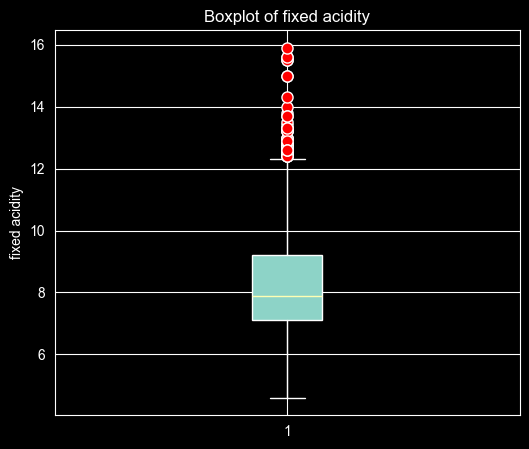

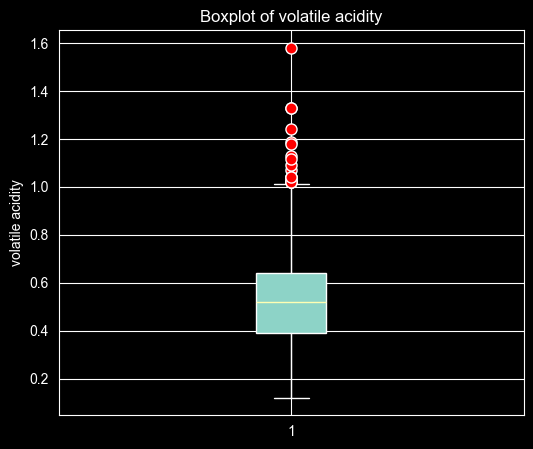

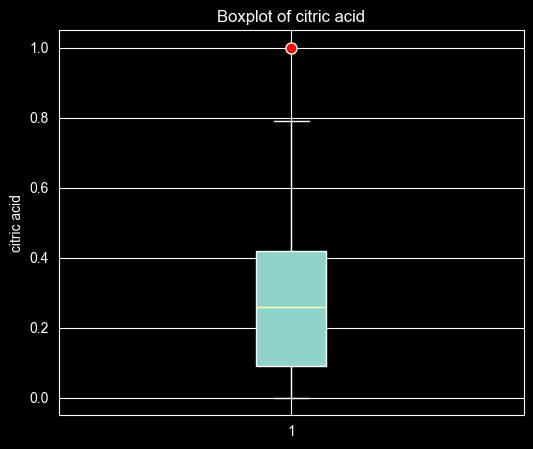

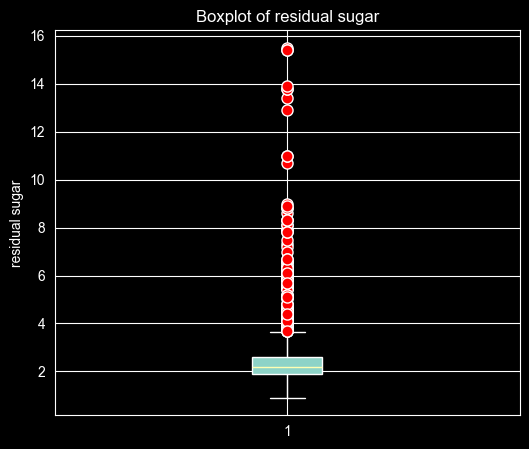

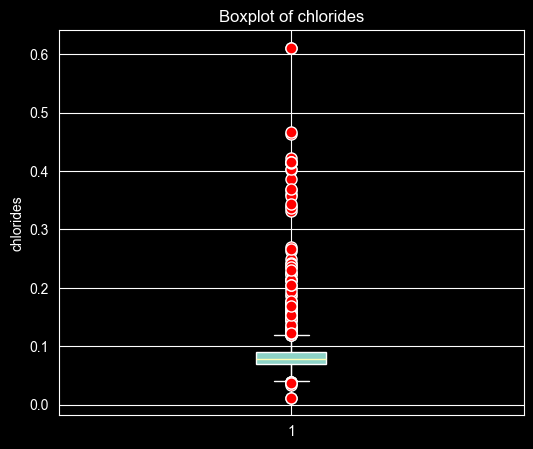

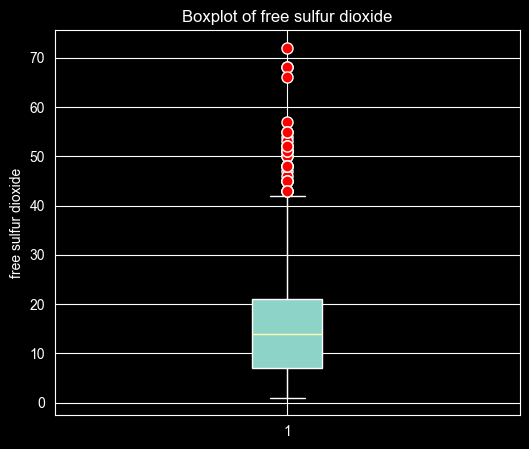

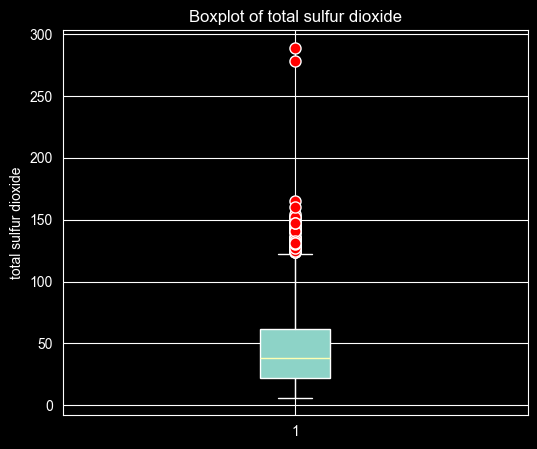

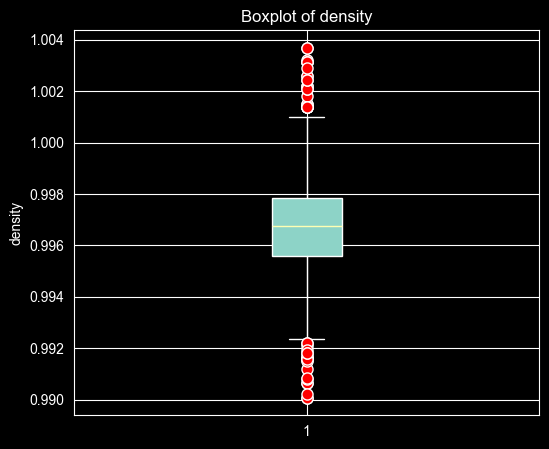

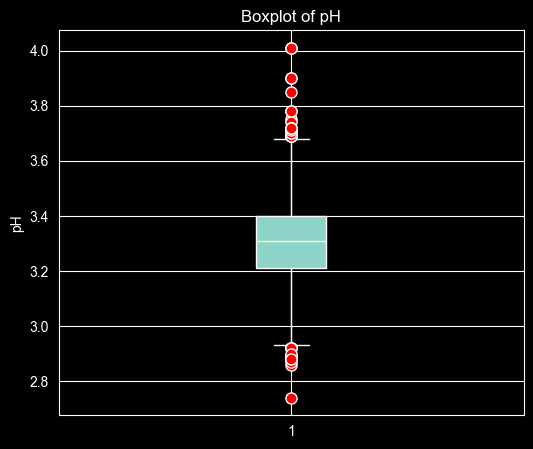

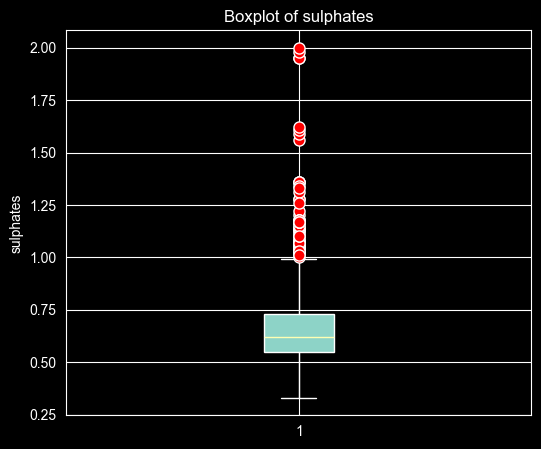

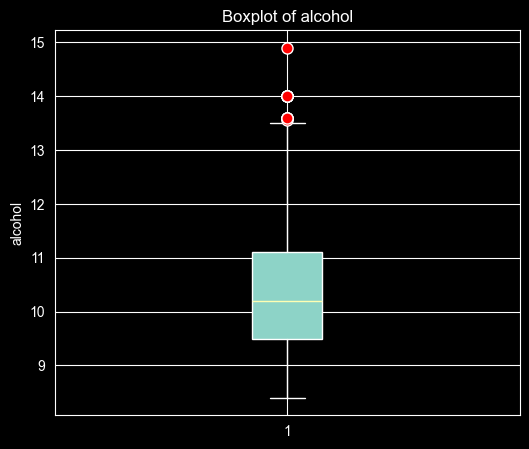

In [16]:
for col in num_cols:
    plt.figure(figsize=(6, 5))
    plt.boxplot(df[col], patch_artist=True,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [17]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col].values
    outliers[col] = outlier_values

for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers: {vals}")


fixed acidity: 49 outliers: [12.8 12.8 15.  15.  12.5 13.3 13.4 12.4 12.5 13.8 13.5 12.6 12.5 12.8
 12.8 14.  13.7 13.7 12.7 12.5 12.8 12.6 15.6 12.5 13.  12.5 13.3 12.4
 12.5 12.9 14.3 12.4 15.5 15.5 15.6 13.  12.7 13.  12.7 12.4 12.7 13.2
 13.2 13.2 15.9 13.3 12.9 12.6 12.6]
volatile acidity: 19 outliers: [1.13  1.02  1.07  1.33  1.33  1.04  1.09  1.04  1.24  1.185 1.02  1.035
 1.025 1.115 1.02  1.02  1.58  1.18  1.04 ]
citric acid: 1 outliers: [1.]
residual sugar: 155 outliers: [ 6.1   6.1   3.8   3.9   4.4  10.7   5.5   5.9   5.9   3.8   5.1   4.65
  4.65  5.5   5.5   5.5   5.5   7.3   7.2   3.8   5.6   4.    4.    4.
  4.    7.    4.    4.    6.4   5.6   5.6  11.   11.    4.5   4.8   5.8
  5.8   3.8   4.4   6.2   4.2   7.9   7.9   3.7   4.5   6.7   6.6   3.7
  5.2  15.5   4.1   8.3   6.55  6.55  4.6   6.1   4.3   5.8   5.15  6.3
  4.2   4.2   4.6   4.2   4.6   4.3   4.3   7.9   4.6   5.1   5.6   5.6
  6.    8.6   7.5   4.4   4.25  6.    3.9   4.2   4.    4.    4.    6.6
  6.    6.

# A3. Handling Missing Data

In [18]:
df_missing = df.copy()

np.random.seed(42)

for col in num_cols:
    n_missing = int(0.05 * len(df_missing))
    missing_indices = np.random.choice(df_missing.index, n_missing, replace=False)
    df_missing.loc[missing_indices, col] = np.nan

df_missing.isnull().sum()

fixed acidity           79
volatile acidity        79
citric acid             79
residual sugar          79
chlorides               79
free sulfur dioxide     79
total sulfur dioxide    79
density                 79
pH                      79
sulphates               79
alcohol                 79
quality                  0
dtype: int64

In [19]:
df_mean = df_missing.fillna(df_missing.mean())

print("Mean imputation - mean of first 5 features:")
print(df_mean[num_cols[:5]].mean())

df_const = df_missing.fillna(0)

print("Constant imputation (0) - mean of first 5 features:")
print(df_const[num_cols[:5]].mean())

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_knn_array = imputer.fit_transform(df_missing[num_cols])

# Создаём DataFrame с числовыми колонками
df_knn = df_missing.copy()
df_knn[num_cols] = df_knn_array

print("KNN imputation - mean of first 5 features:")
print(df_knn[num_cols[:5]].mean())


Mean imputation - mean of first 5 features:
fixed acidity       8.331974
volatile acidity    0.525191
citric acid         0.270408
residual sugar      2.545954
chlorides           0.087585
dtype: float64
Constant imputation (0) - mean of first 5 features:
fixed acidity       7.920325
volatile acidity    0.499243
citric acid         0.257048
residual sugar      2.420169
chlorides           0.083258
dtype: float64
KNN imputation - mean of first 5 features:
fixed acidity       8.342489
volatile acidity    0.526767
citric acid         0.270428
residual sugar      2.542089
chlorides           0.087479
dtype: float64


In [20]:
stats_original = df[num_cols].agg(['mean', 'std'])
stats_const = df_const[num_cols].agg(['mean', 'std'])
stats_mean = df_mean[num_cols].agg(['mean', 'std'])
stats_knn = df_knn[num_cols].agg(['mean', 'std'])

print("Original dataset stats:\n", stats_original)
print("\nConstant imputation stats:\n", stats_const)
print("\nMean imputation stats:\n", stats_mean)
print("\nKNN imputation stats:\n", stats_knn)


Original dataset stats:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       8.319637          0.527821     0.270976        2.538806   0.087467   
std        1.741096          0.179060     0.194801        1.409928   0.047065   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            15.874922             46.467792  0.996747  3.311113   
std             10.460157             32.895324  0.001887  0.154386   

      sulphates    alcohol  
mean   0.658149  10.422983  
std    0.169507   1.065668  

Constant imputation stats:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       7.920325          0.499243     0.257048        2.420169   0.083258   
std        2.479047          0.207441     0.198627        1.505494   0.050441   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            15.182927             44.211382  0.947502  3.148812   
std            

"Мы искусственно добавили 5% пропусков для демонстрации методов обработки.

Constant imputation — быстро и просто, но сильно искажает распределение.

Mean/Median imputation — сохраняет среднее, но снижает разброс и не учитывает связи между признаками.

Predictive imputation (KNN) — использует корреляцию между признаками, сохраняет статистику данных, но требует больше вычислений."

# Level B

In [ ]:
features = ["residual sugar", "alcohol"]  # residual sugar ~ единицы, alcohol ~ десятки


In [ ]:
# Масштабирование
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Min-Max нормализация
scaler_minmax = MinMaxScaler()
df_minmax = df[features].copy()
df_minmax[features] = scaler_minmax.fit_transform(df[features])

# Z-score стандартизация
scaler_std = StandardScaler()
df_std = df[features].copy()
df_std[features] = scaler_std.fit_transform(df[features])


In [ ]:
# Визуализация распределений
plt.figure(figsize=(15,5))

for i, feature in enumerate(features):
    plt.subplot(1,3,1)
    plt.hist(df[feature], bins=30, alpha=0.7, label='Original')
    plt.title(f'Original {feature}')

    plt.subplot(1,3,2)
    plt.hist(df_minmax[feature], bins=30, alpha=0.7, label='MinMax')
    plt.title(f'MinMax {feature}')

    plt.subplot(1,3,3)
    plt.hist(df_std[feature], bins=30, alpha=0.7, label='Standard')
    plt.title(f'Standard {feature}')

plt.tight_layout()
plt.show()


Когда что использовать

Min–Max: сохраняет форму распределения, полезно для алгоритмов с границами [0,1] (NN, kNN).

Z-score: стандартизирует данные к нулевому среднему и единичной дисперсии, полезно для алгоритмов, чувствительных к масштабам (регрессия, SVM, PCA).

In [ ]:
# B2
df["acid_sugar_ratio"] = df["fixed acidity"] / (df["residual sugar"] + 0.1)


In [ ]:
#Дискретизация  Equal-width binning
df["acid_sugar_bin_width"] = pd.cut(df["acid_sugar_ratio"], bins=5)

# Equal-frequency binning
df["acid_sugar_bin_freq"] = pd.qcut(df["acid_sugar_ratio"], q=5)


In [ ]:
# Проверяем распределение:
print(df["acid_sugar_bin_width"].value_counts())
print(df["acid_sugar_bin_freq"].value_counts())


In [ ]:
# One-hot encoding для категориальных
df_encoded = pd.get_dummies(df, columns=["acid_sugar_bin_width", "acid_sugar_bin_freq"], drop_first=True)


# 3 Additional Analytical Tasks

## 3.1 D1. Measures of Similarity and Dissimilarity

In [ ]:
import numpy as np

# Пример числовых векторов
vec1 = np.array([1, 2, 3, 4, 5])
vec2 = np.array([2, 4, 6, 8, 10])

# 1. Евклидово расстояние
euclidean_dist = np.linalg.norm(vec1 - vec2)
print("Euclidean distance:", euclidean_dist)

# 2. Jaccard similarity для множеств
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}
jaccard_sim = len(set1 & set2) / len(set1 | set2)  # пересечение / объединение
print("Jaccard similarity:", jaccard_sim)

# 3a. Cosine similarity
cosine_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print("Cosine similarity:", cosine_sim)

# 3b. Pearson correlation coefficient
pearson_corr = np.corrcoef(vec1, vec2)[0, 1]
print("Pearson correlation:", pearson_corr)


# 3.2 D2. Dimensionality Reduction (PCA)